In [1]:
import pandas as pd
from google.colab import files


In [2]:
uploaded = files.upload()


Saving erp_implementation_data.csv to erp_implementation_data.csv


In [3]:
import io

# Replace 'erp_implementation_data.csv' with your filename
df = pd.read_csv(io.BytesIO(uploaded['erp_implementation_data.csv']))

# Check the first 5 rows
df.head()


,project_id,client_size,industry,num_modules,team_size,client_experience,customizations,data_migration_gb,preparation_complexity,training_hours,support_level,implementation_duration_days
0,P1000,Small,Healthcare,7,3,0,1,2.899516,4,6,Low,73
1,P1001,Large,IT,2,7,0,3,19.733823,2,19,Medium,79
2,P1002,Medium,Education,8,3,0,1,6.646726,4,6,Medium,80
3,P1003,Medium,Retail,11,4,0,5,2.748371,5,15,High,107
4,P1004,Small,Education,6,7,1,1,2.586330,1,49,Medium,39


In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# One-hot encode categorical features
categorical_features = ['client_size', 'industry', 'support_level']
encoder = OneHotEncoder(sparse_output=False)  # Updated parameter here
encoded_cat = encoder.fit_transform(df[categorical_features])

# Numeric features
numeric_features = ['num_modules', 'team_size', 'client_experience', 'customizations',
                    'data_migration_gb', 'preparation_complexity', 'training_hours']

scaler = StandardScaler()
scaled_num = scaler.fit_transform(df[numeric_features])

# Combine features
X = np.hstack([encoded_cat, scaled_num])
y = df['implementation_duration_days'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output: duration days
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6342.5801 - mae: 77.1686 - val_loss: 6517.1611 - val_mae: 78.7110
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6283.2412 - mae: 76.8475 - val_loss: 6269.4468 - val_mae: 77.1479
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6006.0811 - mae: 75.0032 - val_loss: 5836.6064 - val_mae: 74.3412
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5547.6040 - mae: 71.8268 - val_loss: 5109.7148 - val_mae: 69.3802
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4768.0781 - mae: 66.4783 - val_loss: 4018.8484 - val_mae: 61.2326
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3478.0859 - mae: 56.1713 - val_loss: 2644.9624 - val_mae: 49.1616
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2256.9033 - mae: 44.7720 - val_loss: 1269.1497 - val_mae: 33.1756
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 948.7974 - mae: 27.4997 - val_loss: 387.9156 - val_mae: 16.9023
Epoch 9/50
20/20 ━━━

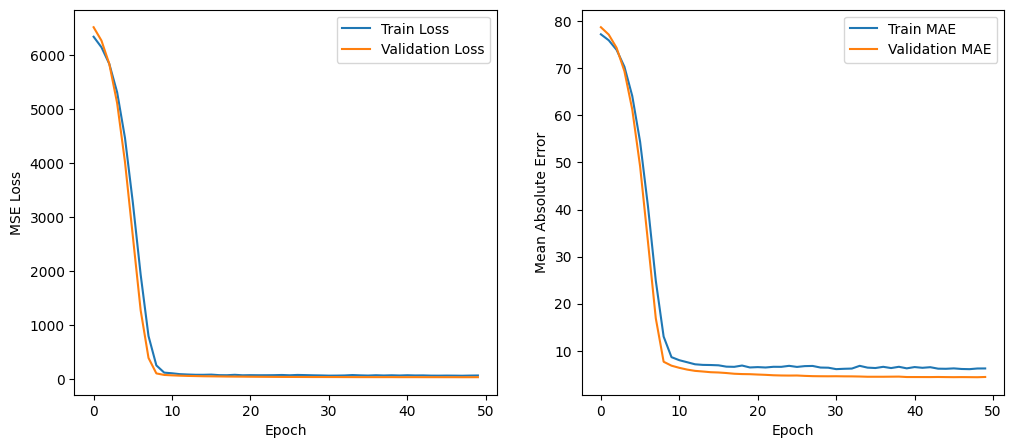

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.2f}')
print(f'Test MAE: {test_mae:.2f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.7092 - mae: 4.3819  
Test Loss: 29.59
Test MAE: 4.31


In [11]:
y_pred = model.predict(X_test)

# Example: Compare first 10 true vs predicted values
for i in range(10):
    print(f'True: {y_test[i]:.2f}, Predicted: {y_pred[i][0]:.2f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
True: 68.00, Predicted: 61.98
True: 113.00, Predicted: 112.38
True: 103.00, Predicted: 97.99
True: 105.00, Predicted: 102.24
True: 85.00, Predicted: 90.45
True: 106.00, Predicted: 101.43
True: 82.00, Predicted: 85.23
True: 99.00, Predicted: 105.54
True: 64.00, Predicted: 63.91
True: 66.00, Predicted: 58.83


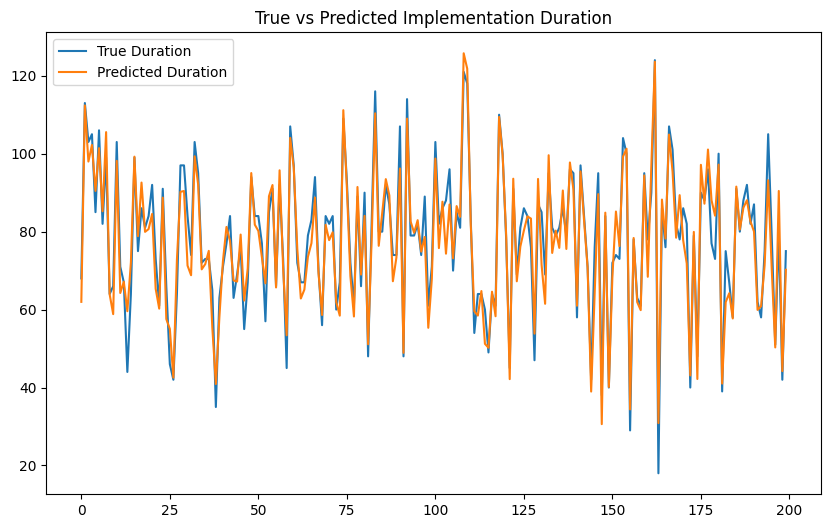

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test, label='True Duration')
plt.plot(y_pred, label='Predicted Duration')
plt.legend()
plt.title("True vs Predicted Implementation Duration")
plt.show()


In [13]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 6462.3184 - mae: 78.1162 - val_loss: 6613.6982 - val_mae: 79.3042
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6085.1035 - mae: 75.6111 - val_loss: 6515.7515 - val_mae: 78.7316
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6038.5005 - mae: 75.5276 - val_loss: 6339.6909 - val_mae: 77.7191
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5684.5288 - mae: 73.3920 - val_loss: 6026.6396 - val_mae: 75.9070
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5218.1304 - mae: 70.6017 - val_loss: 5483.7632 - val_mae: 72.6528
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4459.7793 - mae: 65.4052 - val_loss: 4660.5610 - val_mae: 67.2619
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3740.6011 - mae: 59.7430 - val_loss: 3593.3210 - val_mae: 59.0556
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2687.3875 - mae: 49.6546 - val_loss: 2515.6929 - val_mae: 48.6924
Epoch 9

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Then do train-test split again using X_poly instead of X
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [16]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # X_train.shape[1] should be 171 here
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential([
    Input(shape=(171,)),
    Dense(128, activation='relu'),
    # other layers here
])


In [17]:
print(X_train.shape)  # Should be (num_samples, num_features)


(800, 171)


In [19]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(171,)),        # Fix input shape here
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)                    # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# Make predictions and compare
predictions = model.predict(X_test)
for true, pred in zip(y_test[:10], predictions[:10]):
    print(f"True: {true:.2f}, Predicted: {pred[0]:.2f}")


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6367.0254 - mae: 77.3604 - val_loss: 6046.2251 - val_mae: 75.6860
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5440.3530 - mae: 71.2760 - val_loss: 4793.8364 - val_mae: 67.1548
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4153.0728 - mae: 61.8294 - val_loss: 2670.1375 - val_mae: 49.7545
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1927.0377 - mae: 41.2267 - val_loss: 599.2772 - val_mae: 21.8274
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 330.9305 - mae: 15.3936 - val_loss: 159.0387 - val_mae: 9.9459
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 154.8437 - mae: 9.7948 - val_loss: 111.2784 - val_mae: 8.3511
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 90.9338 - mae: 7.7013 - val_loss: 93.1388 - val_mae: 7.5866
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.2924 - mae: 6.4981 - val_loss: 82.5826 - val_mae: 7.0530
Epoch 9/100
20/

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then retrain the model using X_train_scaled and test on X_test_scaled


In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Original shape: {X_train.shape}, New shape after poly features: {X_train_poly.shape}")


Original shape: (800, 171), New shape after poly features: (800, 14877)


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)  # reduce to 100 features, tweak this number
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

print(f"Shape after PCA: {X_train_pca.shape}")


Shape after PCA: (800, 100)


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_pca, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6235.9888 - mae: 76.4752 - val_loss: 5174.1694 - val_mae: 69.4082
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4501.7993 - mae: 63.5758 - val_loss: 2859.7861 - val_mae: 47.2137
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2254.0579 - mae: 41.4455 - val_loss: 2022.9558 - val_mae: 32.7998
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1459.4772 - mae: 30.8837 - val_loss: 1313.9143 - val_mae: 25.6083
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 655.1013 - mae: 20.6076 - val_loss: 932.8760 - val_mae: 19.0311
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 449.5554 - mae: 16.2714 - val_loss: 673.2051 - val_mae: 15.5069
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 297.2104 - mae: 13.7099 - val_loss: 575.0394 - val_mae: 14.2385
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 298.4825 - mae: 13.5538 - val_loss: 514.0482 - val_mae: 13.6022
Epo

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    Dropout(0.3),  # helps prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # output layer for regression (single continuous value)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
test_loss, test_mae = model.evaluate(X_test_pca, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

predictions = model.predict(X_test_pca)
for true_val, pred_val in zip(y_test[:10], predictions[:10]):
    print(f"True: {true_val}, Predicted: {pred_val}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 413.7294 - mae: 16.6148 
Test Loss: 401.91436767578125
Test MAE: 16.509681701660156


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
True: 68, Predicted: [50.472664]
True: 113, Predicted: [106.58018]
True: 103, Predicted: [86.66341]
True: 105, Predicted: [77.45773]
True: 85, Predicted: [99.75571]
True: 106, Predicted: [55.72879]
True: 82, Predicted: [50.141075]
True: 99, Predicted: [89.950836]
True: 64, Predicted: [66.60446]
True: 66, Predicted: [35.251102]
